# Trabajo Final
## Estadística de la población
---

### Docente:
### Estudiantes: Tricarico Federico, Ise Daniel

## Introducción

El presente informe muestra los resultados a los que llegamos a partir del empleo de métodos estadísticos y la reflexión propia sobre la base de datos de Indec. En particular, consideramos el último período de tiempo disponible [online](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos): el cuarto trimestre de 2021.

Sobre esa base de datos, usando herramientas de código abierto como Python, pudimos hacer diferentes análisis estadísticos. Tratamos, en particular, de seleccionar diferentes conjuntos de variables, para tratar de poner a prueba algunas hipótesis que muestran tanto las posibilidad que ofrecen las herramientas estadísticas para el tratamiento de estos problemas, así como la potencialidad que subyace en herramientas de código abierto, como son Python y sus diferentes módulos.

El trabajo emplea algunos de los procesamientos vistos en la materia recurriendo a la base de datos mencionada. Parte por la selección de las variables a considerar, se muestran sus tablas de frecuencia y se realizan algunos gráficos sobre sus resultados. Así mismo, se calculan las medidas de tendencia central pertinentes a las diferentes variables. 

Esbozando algunas hipótesis que vinculan las relaciones entre ingreso laboral por hora trabajada y la variable sexo, se trata de hacer algunos test de significación entre las dos variables, construyendo tanto una hipótesis como una hipótesis nula. Asímismo, se elabora una correlación bivariada y se aplica un análisis de regresión lineal entre las diferentes variables consideradas.

### Actividades:

* ~~Elegir una base de datos~~
* ~~Seleccionar dos variables~~
* ~~Construir tablas de frecuencia~~
* ~~Graficar~~
* Calcular medidas de tendencia central
* Aplicar test de significación entre dos variables establecidas (con hipótesis e hipótesis nula)
* Elaborar correlación bivariada
* Aplicar Regresión lineal

#### Base de datos:

https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2021_xls.zip

#### Variables seleccionadas:

* Ingreso laboral (P21)
* Ingreso total individual (P47T)
* Horas trabajadas (PP3E_TOT)
* Sexo (CH04)
* Edad (posible) (CH06)

#### Indicadores a construir:
Ingreso laboral según sexo
Ingreso laboral por hora trabajada
Ingreso laboral por hora trabajada según sexo
(¿Horas trabajadas según nivel de instrucción?

#### Tipos de variable: 

* Contínuas: Ingreso Laboral, Ingreso Total Individual, Horas trabajadas

* Cualitativas nominales: Sexo

Tabla de frecuencia por intervalo para las contínuas (salvo que las horas se registren discretas).
Tabla de frecuencia para sexo (quizá horas también).

Gráficos de barra para la representación gráfica de las frecuencias e interpretación. (Las contínuas invitan a hacer histogramas).

Medidas de tendencia central para ingreso. Tiene sentido dividir en deciles esta variable.

¿Qué es test de significación? ¿Cómo se calcula?

Hacer la correlación y regresión lineal.

Para iniciar el trabajo, primero hay que traer las librerías que vamos a utilizar tanto para leer los datos como para hacer el análisis. Estas librerías son: `numpy`, `pandas` y `matplotlib`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16,6)})

Una vez incorporadas las librerías que se van a utilizar en el análisis y representación gráfica, se procede a leer los datos desde un archivo `.csv`, ubicado en la carpeta data. Este archivo se lee con la función `pd.read_csv()`.

In [3]:
db = pd.read_csv('./data/usu_individual_T421.csv', sep=';', low_memory=False)
db.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPPQHMOLPCDEGNFJ00714305,2021,4,1,4,1,44,N,17,309,...,9.0,7,33500,6,7.0,5,NaN,7.0,5,411
1,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,1,1,1,S,33,1573,...,NaN,4,32000,6,NaN,6,6.0,NaN,6,2285
2,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,2,1,1,S,33,1573,...,NaN,4,32000,6,NaN,6,6.0,NaN,6,2285
3,TQRMNOQYRHMOQRCDEIJAH00718661,2021,4,1,1,1,1,S,33,2635,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
4,TQRMNOPSTHMMLPCDEFMDB00713515,2021,4,1,2,1,43,N,6,87,...,7.0,7,43000,7,8.0,8,NaN,8.0,8,129


Para comprobar que la base de datos se haya incorporado de forma satisfactoria, se lee el atributo `db.shape` con el siguiente comando:

In [4]:
db.shape

(50154, 177)

El comando nos dice que la base de datos, perteneciente al cuarto trimestre de 2021 de la EPH, contiene 177 variables, una en cada columna, y 50.154 mediciones, una en cada fila.

La variable `db` contiene a la base de datos completa. Una posibilidad es elegir un _subconjunto_ de columnas, para simplificar la representación gráfica de los datos. Las variables seleccionadas, y sus nombres en la base de datos de la EPH, son:

* Ingreso laboral (P21)
* Ingreso total individual (P47T)
* Horas trabajadas (PP3E_TOT)
* Sexo (CH04)

Vamos a asignar dichas variables a `df1`.

In [16]:
df1 = db[['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'ESTADO', 'P21', 'P47T', 'PP3E_TOT', 'CH04', 'CH03']]
df1.head()

,CODUSU,NRO_HOGAR,COMPONENTE,ESTADO,P21,P47T,PP3E_TOT,CH04,CH03
0,TQRMNOPPQHMOLPCDEGNFJ00714305,1,4,3,0,0.0,NaN,1,3
1,TQRMNOQPYHKMPUCDEIJAH00663642,1,1,3,0,35000.0,NaN,1,1
2,TQRMNOQPYHKMPUCDEIJAH00663642,1,2,3,0,29000.0,NaN,2,2
3,TQRMNOQYRHMOQRCDEIJAH00718661,1,1,1,-9,-9.0,45.0,1,1
4,TQRMNOPSTHMMLPCDEFMDB00713515,1,2,3,0,26000.0,NaN,2,2


En la medida en que nos interesan las personas que cuentan con un trabajo, vamos a filtrar en la variable `Estado` aquellas filas que sean iguales a 1, es decir, que traten de personas _ocupadas_. Limpiamos, asímismo, los valores de ingreso laboral menores a 0, entendiendo que probablemente se trate de valores faltantes.

In [17]:
df1 = df1[df1['ESTADO'] == 1]
df1 = df1[df1['P21']>0]
df1.head()

,CODUSU,NRO_HOGAR,COMPONENTE,ESTADO,P21,P47T,PP3E_TOT,CH04,CH03
6,TQRMNOQQSHJMKUCDEHJGH00702130,1,2,1,120000,120000.0,48.0,1,3
8,TQRMNOPPRHJLKTCDEGNFJ00678218,1,2,1,75000,75000.0,40.0,2,3
11,TQRMNOPPRHJLKTCDEGNFJ00678218,1,6,1,80000,80000.0,40.0,1,4
12,TQRMNORSTHKLKSCDEGNFJ00661706,1,1,1,45000,45000.0,40.0,2,1
15,TQRMNOPSRHKLKTCDEGNFJ00716519,1,1,1,30000,40504.0,70.0,2,1


In [21]:
df1.shape

(17476, 9)

Con el `dataframe` delimitado y guardado con el nombre `df1`, ya es posible profundizar en el análisis propiamente estadístico. El práctico propone iniciar el análisis construyendo las tablas de frecuencia de las diferentes variables consideradas, actividad en la que se profundiza en el apartado que sigue.

## Análisis de frecuencia

En primer lugar, se construirá la tabla de frecuencia, con el método `value_count()`, considerando la variable Ingreso Laboral (`P21`). Veamos, en primer lugar, sus valores máximos y mínimos, así como los diferentes valores que la misma adquiere.

In [18]:
df1.P21.min() # Vemos, en primer lugar, el valor mínimo

300

In [19]:
df1.P21.max() # Ahora, calculamos el valor máximo

4000000

Como se puede ver, la variable Ingreso Laboral (`P21`) va de mediciones de $\$300$ a mediciones de $\$4.000.000$. Asimismo, se trata de una variable con muchos valores únicos, a saber:

In [20]:
len(df1.P21.unique()) # Contamos la cantidad de valores únicos que adquiere la variable P21

386

Al tratarse de una variable contínua, de gran amplitud, y con muchos valores únicos, se tomó la decisión de construir una tabla de frecuencia por intervalo. La construcción de los intervalos de clase adoptó, de manera arbitraria, una amplitud de $\$15.000$, para mostrar la diversidad de situaciones salariales, sin perder atención al detalle, pero concentrando el resto de ingresos laborales por encima de $\$195.000$, en la última fila.

In [45]:
bin_range = np.arange(0,200000,10000)
freq = np.clip(df1['P21'], bin_range[0], bin_range[-1])

freq = freq.value_counts(sort=False,bins = bin_range).to_frame()
freq.rename(columns = {'P21':'Frecuencia'}, inplace=True)

freq['Frecuencia Acumulada'] = round(freq['Frecuencia'].cumsum()/freq['Frecuencia'].sum()*100, 2)
freq

,Frecuencia,Frecuencia Acumulada
"(-0.001, 10000.0]",1643,9.40
"(10000.0, 20000.0]",2767,25.23
"(20000.0, 30000.0]",2659,40.45
"(30000.0, 40000.0]",2385,54.10
"(40000.0, 50000.0]",2122,66.24
"(50000.0, 60000.0]",1588,75.33
"(60000.0, 70000.0]",1193,82.15
"(70000.0, 80000.0]",962,87.66
"(80000.0, 90000.0]",540,90.75
"(90000.0, 100000.0]",612,94.25


De la tabla de frecuencia agrupada de la variable Ingreso Laboral se desprende que el $25\%$ de menores ingresos se encuentra ganando hasta $\$20.000$; poco más del $50\%$ se concentra hasta los $\$40.000$ de ingreso; y un $75\%$ se encuentra en el sector que llega a $\$60.000$ de Ingreso Laboral.

Esta distribución de frecuencia se puede graficar en un histograma, como se exhibe a continuación.

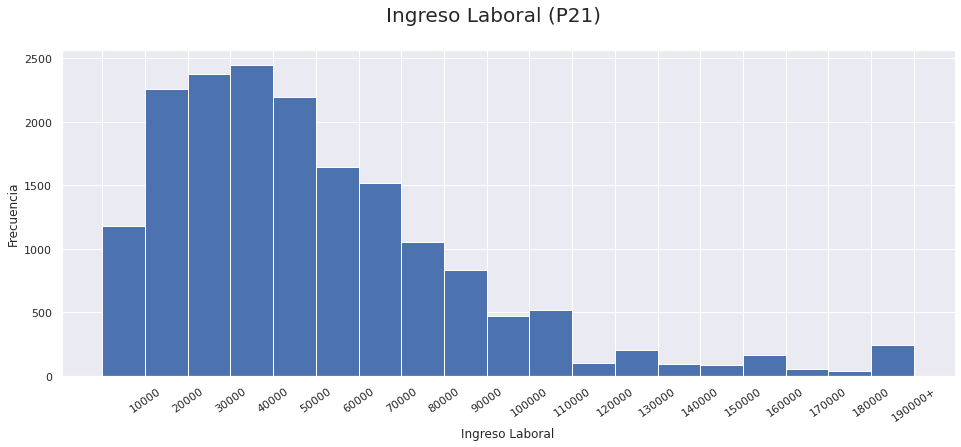

In [46]:
bin_range = np.arange(0,200000,10000) # Defino el límite inferior y superior de cada barra => [i, s)

plt.hist(np.clip(df1['P21'], bin_range[0], bin_range[-1]), bins = bin_range) 
# Le digo plt que quiero un histograma
# Con np.clip le pido que tenga de rango inferior el primer elemento de bin_range 
# y que incluya lo que está por encima del superior

plt.xlabel("Ingreso Laboral") # Defino el label del eje x
plt.ylabel("Frecuencia") # Defino el label del eje y

n_xticks = [x for x in range(0, 200000, 10000)] # creo una lista de número para definir los valores del eje x
xticks = [str(x) for x in n_xticks] # creo una lista de strings, con esos mismos números, para los labels del eje x
xticks[0] = '' # Saco el 0 por redundante
xticks[-1] = '190000+' # Cambio el último componente de la lista agregándole un +

plt.suptitle('Ingreso Laboral (P21)', fontsize=20) # Le doy un título al plot, le asigno una fuente de 20p
plt.xticks(n_xticks, xticks, rotation=35) # Le asigno los valores creados a los labels del eje x
plt.show() # Muestro el plot